# Assignment 1
## Softmax excercise

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  mask = np.random.choice(num_training, num_dev, replace=False)
  X_dev = X_train[mask]
  y_dev = y_train[mask]
  
  # Preprocessing: reshape the image data into rows
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
  
  # Normalize the data: subtract the mean image
  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  X_dev -= mean_image
  
  # add bias dimension and transform into columns
  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
  X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
  return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


In [7]:
# 首先实现一个嵌套循环的简单版本
from cs231n.classifiers.softmax import softmax_loss_naive
import time

# 产生一个随机 Softmax 权重矩阵
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# 作为一个粗略的检查，我们的损失值应该是接近 -log(0.1) 的
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.343463
sanity check: 2.302585


为什么我们希望这时的损失值接近于 $-log(0.1)$？

答：

因为权重矩阵 $W$ 是按照均匀分布随机选取的，所以每个类的预测概率是均匀分布的，且相互独立，也就是 $1/10$ （cifar-10 中有 10 个类）。因此，每个样本的交叉熵就是 $-log(0.1)$

In [12]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# 使用梯度检查
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

print('--------Gradient Check with Regularization --------')

# 带上正则化项进行梯度检查
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 2.296086 analytic: 2.296086, relative error: 1.991304e-08
numerical: -1.988030 analytic: -1.988030, relative error: 1.008814e-09
numerical: 0.150680 analytic: 0.150680, relative error: 5.486915e-08
numerical: -1.201795 analytic: -1.201795, relative error: 1.319813e-08
numerical: 1.636961 analytic: 1.636961, relative error: 3.835284e-08
numerical: -2.054795 analytic: -2.054795, relative error: 1.051252e-08
numerical: -4.532180 analytic: -4.532180, relative error: 6.150265e-09
numerical: 2.500197 analytic: 2.500197, relative error: 3.083632e-08
numerical: 0.890703 analytic: 0.890702, relative error: 8.246528e-08
numerical: -1.548050 analytic: -1.548050, relative error: 1.260507e-08
--------Gradient Check with Regularization --------
numerical: 0.362745 analytic: 0.362745, relative error: 1.122590e-07
numerical: -0.780793 analytic: -0.780793, relative error: 8.970380e-09
numerical: -0.410603 analytic: -0.410603, relative error: 2.951460e-08
numerical: 2.467351 analytic: 2.46735

In [13]:
# 向量化实现 softmax
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vetorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vetorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.343463e+00 computed in 0.075005s
vectorized loss: 2.343463e+00 computed in 0.006993s
Loss difference: 0.000000
Gradient difference: 0.000000


In [17]:
# 使用验证集调优
# 在比较好的超参数集下，分类器的准确率可以达到 0.35（验证集上）

from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 2e-7, 5e-7]
regularization_strengths = [(1 + 0.1 * i) * 1e4 for i in range(-3, 4)] + [(5 + 0.1 * i) * 1e4 for i in range(-3, 4)]

for lr in learning_rates:
    for rs in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train, lr, rs, num_iters=2000)
        y_train_pred = softmax.predict(X_train)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = softmax.predict(X_val)
        val_accuracy = np.mean(y_val == y_val_pred)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_softmax = softmax           
        results[(lr,rs)] = train_accuracy, val_accuracy


for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 7.000000e+03 train accuracy: 0.337245 val accuracy: 0.341000
lr 1.000000e-07 reg 8.000000e+03 train accuracy: 0.352490 val accuracy: 0.351000
lr 1.000000e-07 reg 9.000000e+03 train accuracy: 0.351306 val accuracy: 0.352000
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.358633 val accuracy: 0.374000
lr 1.000000e-07 reg 1.100000e+04 train accuracy: 0.360816 val accuracy: 0.377000
lr 1.000000e-07 reg 1.200000e+04 train accuracy: 0.364571 val accuracy: 0.372000
lr 1.000000e-07 reg 1.300000e+04 train accuracy: 0.362061 val accuracy: 0.370000
lr 1.000000e-07 reg 4.700000e+04 train accuracy: 0.335286 val accuracy: 0.347000
lr 1.000000e-07 reg 4.800000e+04 train accuracy: 0.326367 val accuracy: 0.338000
lr 1.000000e-07 reg 4.900000e+04 train accuracy: 0.330735 val accuracy: 0.343000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.329102 val accuracy: 0.341000
lr 1.000000e-07 reg 5.100000e+04 train accuracy: 0.327776 val accuracy: 0.337000
lr 1.000000e-07 reg 5.200000

In [18]:
# 将 best softmax 用到测试集上
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.384000


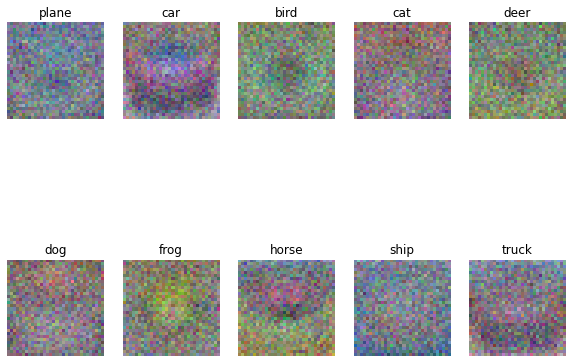

In [20]:
# 可视化权重矩阵

w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])